## Importação das bibliotecas e Dataframe

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/coffee-quality-data-cqi/df_arabica_clean.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os

In [4]:
df = pd.read_csv("/kaggle/input/coffee-quality-data-cqi/df_arabica_clean.csv")

In [5]:
df_graph = df.copy()

## Limpeza dos dados

In [6]:
df.head(5)

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [7]:
colunas = df.columns[:]
colunas

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

In [8]:
df.drop(df.columns[[0, 1, 4, 6, 7, 8, 14, 18, 26, 27, 28, 34]], axis=1, inplace=True)

In [9]:
df.columns

Index(['Country of Origin', 'Farm Name', 'Mill', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Grading Date',
       'Owner', 'Variety', 'Processing Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Color', 'Category Two Defects', 'Expiration', 'Certification Body',
       'Certification Address', 'Certification Contact'],
      dtype='object')

In [10]:
df = df[(df['Category Two Defects']!=16)&(df['Category Two Defects']!=10)&(df['Category Two Defects']!=13)]
df = df[(df['Category One Defects']!=5)&(df['Category One Defects']!=3)&(df['Category One Defects']!=4)]

In [11]:
df.isna().sum()

Country of Origin        0
Farm Name                2
Mill                     3
Region                   2
Producer                 1
Number of Bags           0
Bag Weight               0
In-Country Partner       0
Grading Date             0
Owner                    0
Variety                  6
Processing Method        5
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Overall                  0
Defects                  0
Total Cup Points         0
Moisture Percentage      0
Category One Defects     0
Color                    0
Category Two Defects     0
Expiration               0
Certification Body       0
Certification Address    0
Certification Contact    0
dtype: int64

In [12]:
df['Farm Name'].fillna('none', inplace = True)
df['Mill'].fillna('none', inplace = True)
df['Region'].fillna('none', inplace = True)
df['Producer'].fillna('none', inplace = True)
df['Variety'].fillna('none', inplace = True)
df['Processing Method'].fillna('none', inplace = True)

In [13]:
df.isna().sum()

Country of Origin        0
Farm Name                0
Mill                     0
Region                   0
Producer                 0
Number of Bags           0
Bag Weight               0
In-Country Partner       0
Grading Date             0
Owner                    0
Variety                  0
Processing Method        0
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Overall                  0
Defects                  0
Total Cup Points         0
Moisture Percentage      0
Category One Defects     0
Color                    0
Category Two Defects     0
Expiration               0
Certification Body       0
Certification Address    0
Certification Contact    0
dtype: int64

In [14]:
df.head(5)

,Country of Origin,Farm Name,Mill,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Grading Date,Owner,...,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,Colombia,Finca El Paraiso,Finca El Paraiso,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,Japan Coffee Exchange,"September 21st, 2022",Coffee Quality Union,...,0.0,89.33,11.8,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,Taiwan,Royal Bean Geisha Estate,Royal Bean Geisha Estate,Chiayi,曾福森,1,80 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,...,0.0,87.58,10.5,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,Laos,OKLAO coffee farms,oklao coffee processing plant,Laos Borofen Plateau,WU TAO CHI,19,25 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,...,0.0,87.42,10.4,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,Costa Rica,La Cumbre,La Montana Tarrazu MIll,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,Japan Coffee Exchange,"September 21st, 2022",Coffee Quality Union,...,0.0,87.17,11.8,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,Colombia,Finca Santuario,Finca Santuario,"Popayan,Cauca",Camilo Merizalde,2,24 kg,Japan Coffee Exchange,"March 6th, 2023",Coffee Quality Union,...,0.0,87.08,11.6,0,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


## Visualização dos dados

In [15]:
df_country = df.groupby('Country of Origin')['Total Cup Points'].mean().reset_index()
df['freq'] = df.groupby('Country of Origin')['Country of Origin'].transform('count')

In [16]:
df_country, df['freq']

(               Country of Origin  Total Cup Points
 0                         Brazil         81.883000
 1                       Colombia         83.877368
 2                     Costa Rica         83.740000
 3                    El Salvador         82.064000
 4                       Ethiopia         84.960909
 5                      Guatemala         84.301429
 6                       Honduras         83.282308
 7                      Indonesia         83.693333
 8                          Kenya         83.710000
 9                           Laos         83.390000
 10                    Madagascar         84.250000
 11                        Mexico         82.363333
 12                       Myanmar         83.670000
 13                     Nicaragua         81.750000
 14                        Panama         83.625000
 15                          Peru         82.332500
 16                        Taiwan         84.350328
 17  Tanzania, United Republic Of         84.735000
 18         

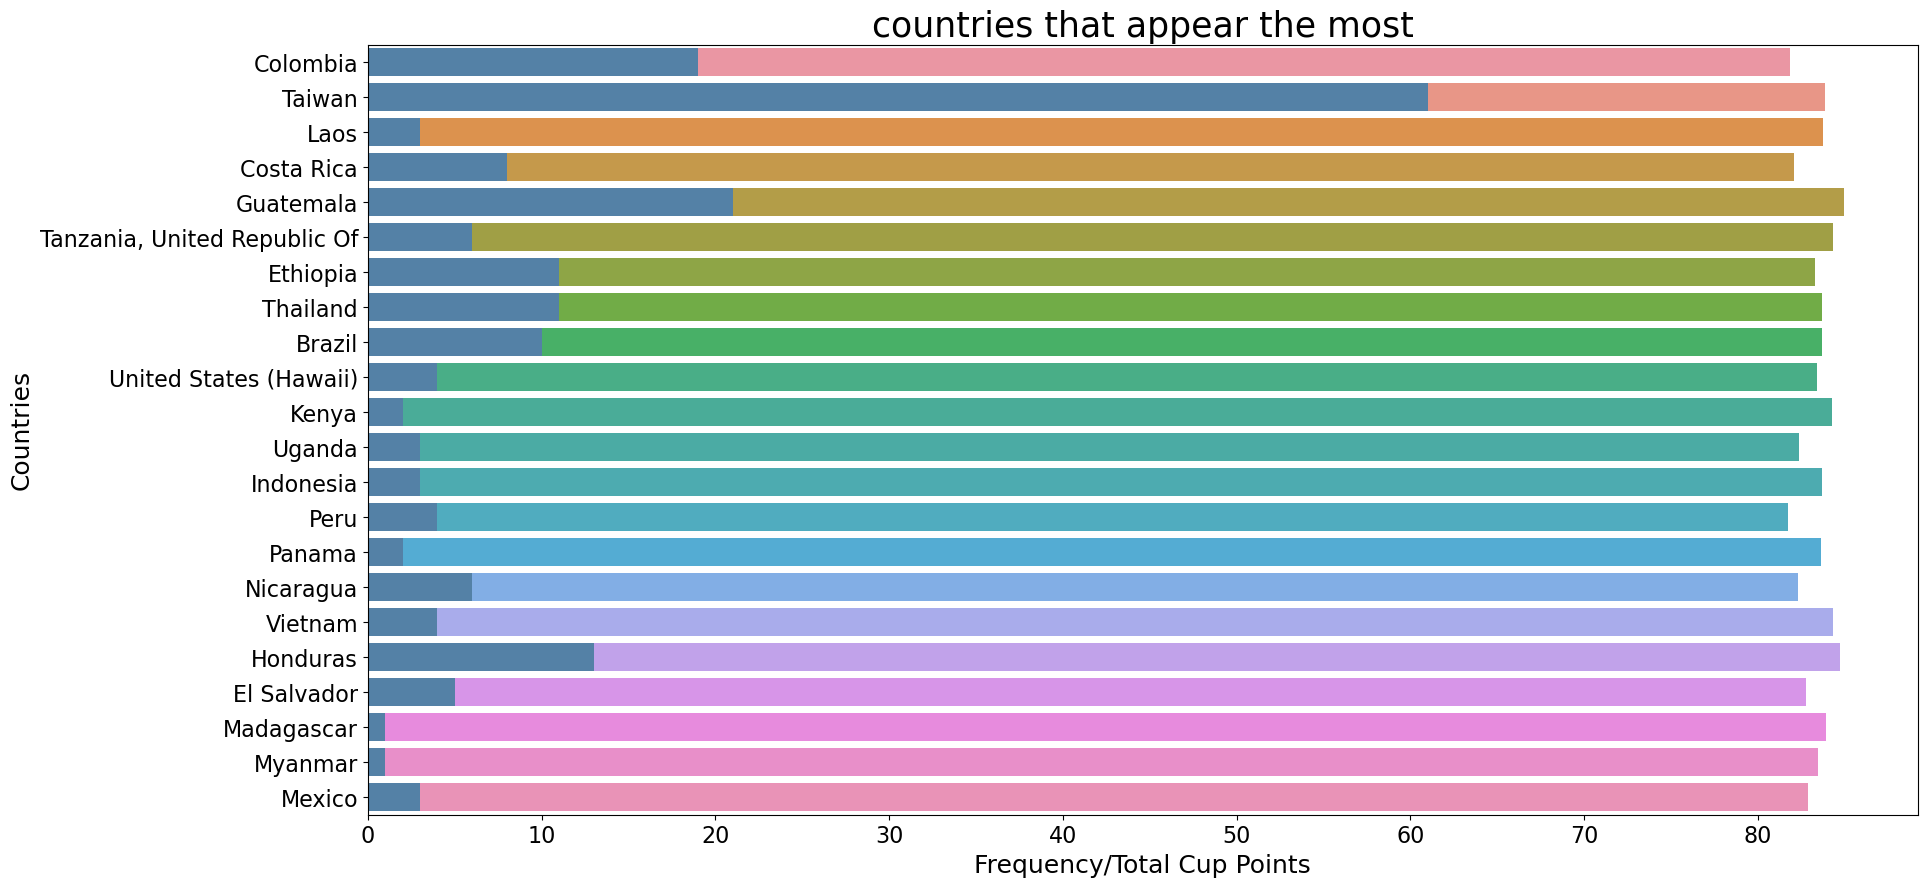

In [17]:
fig, ax = plt.subplots(figsize=(20,10))


sns.barplot(x=df_country['Total Cup Points'], y=df_country['Country of Origin'], orient='h')
sns.barplot(y=df['Country of Origin'], x=df['freq'], orient='h', color='steelblue')

ax.set_xlabel('Frequency/Total Cup Points', fontsize=18)
ax.set_ylabel('Countries', fontsize=18)
ax.set_title('countries that appear the most', size=25)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)

plt.show()

In [18]:
fig = px.scatter(data_frame=df_graph, x="Processing Method", y="Country of Origin",
                 color="Processing Method", title="Processing method of countries", height=700)
fig.update_traces(marker_size=8)

fig.show()

## Separação Classe

In [19]:
X = df.drop(columns=['Category One Defects', 'Category Two Defects']).values

y_one = df.loc[:, 'Category One Defects'].values
y_two = df.loc[:, 'Category Two Defects'].values

In [20]:
X.shape, y_one.shape

((201, 28), (201,))

In [21]:
np.unique(y_one, return_counts=True)

(array([0, 1, 2]), array([190,   6,   5]))

In [22]:
np.unique(y_two, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 11, 12]),
 array([74, 33, 37, 16, 13, 13,  4,  4,  2,  3,  2]))

<Axes: ylabel='count'>

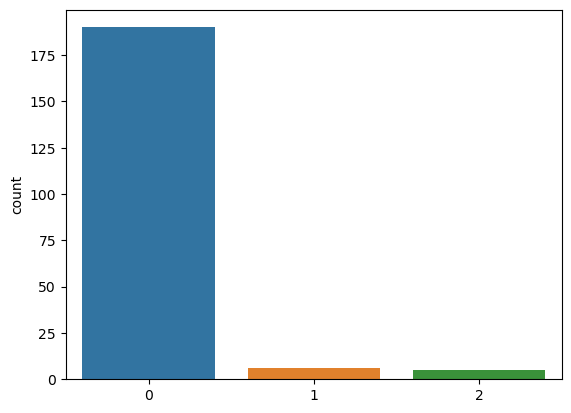

In [23]:
sns.countplot(x=y_one)

<Axes: ylabel='count'>

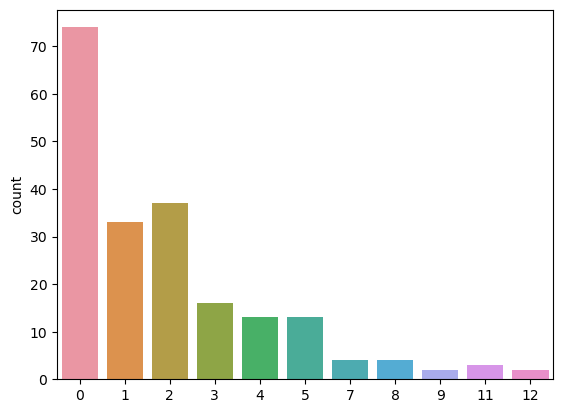

In [24]:
sns.countplot(x=y_two)

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

for i in range(X.shape[1]):
  X[:,i] = label.fit_transform(X[:,i])
X

array([[1, 37, 48, ..., 20, 20, 10],
       [16, 90, 88, ..., 17, 10, 12],
       [9, 85, 107, ..., 17, 10, 2],
       ...,
       [13, 41, 8, ..., 8, 11, 5],
       [9, 0, 30, ..., 20, 20, 2],
       [0, 107, 15, ..., 11, 17, 7]], dtype=object)

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
smote = SMOTE(sampling_strategy= 'minority',k_neighbors=1)

X_over_one, y_over_one = smote.fit_resample(X,y_one)
np.unique(y_over_one, return_counts=True)

X_over_two, y_over_two = smote.fit_resample(X,y_two)
np.unique(y_over_two, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 11, 12]),
 array([74, 33, 37, 16, 13, 13,  4,  4, 74,  3,  2]))

In [28]:
X_scaler = StandardScaler()

X_scaled_one = X_scaler.fit_transform(X_over_one)
X_scaled_one

X_scaled_two = X_scaler.fit_transform(X_over_two)
X_scaled_two

array([[-1.0670316 , -1.21333073, -0.52738771, ...,  1.05538824,
         1.81968067,  0.44190065],
       [ 1.16701301,  0.0226891 ,  0.4108735 , ...,  0.4995678 ,
        -0.1653451 ,  1.09889509],
       [ 0.12445886, -0.09391655,  0.85654757, ...,  0.4995678 ,
        -0.1653451 , -2.18607708],
       ...,
       [-0.70090629,  0.31712294, -1.20431482, ...,  0.11102841,
        -0.43824706, -0.09645541],
       [-0.95010093,  0.43418305,  0.18239786, ...,  0.62768279,
         0.55813412,  0.26996406],
       [-0.77772636,  0.35320945, -0.77682826, ...,  0.27029919,
        -0.13108929,  0.01650195]])

In [29]:
# for i in range(X.shape[1]):
#   print(X_scaled[:,i].var())

In [30]:
# from sklearn.feature_selection import VarianceThreshold

# selecao = VarianceThreshold(threshold=0.9999999999999999)
# X_variancia = selecao.fit_transform(X_scaled)
# X_variancia.shape
# selecao.variances_

In [31]:
# indices = np.where(selecao.variances_ > 0.9999999999999999)
# indices
# colunas[indices]
# 4, 7, 8, 14, 18, 19, 26, 27, 28, 34

## Separação treino e teste

In [91]:
from sklearn.model_selection import train_test_split

X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(X_scaled_one, y_over_one, test_size=0.2, random_state=0)
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X_scaled_two, y_over_two, test_size=0.25, random_state=43)

In [33]:
y_train_one

array([0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2,
       0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2,
       2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2,
       0, 1, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2,
       0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2,
       2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2,

In [34]:
y_train_two

array([ 3,  0,  0,  0,  2,  9,  1,  3,  2,  4,  9,  3,  1,  0,  0,  0,  0,
        9,  7,  0,  9,  9,  0,  1,  0,  3,  8,  0,  9,  9,  0,  9,  4,  3,
        3,  3,  0,  1,  5,  9,  0,  1,  9,  0,  0,  9, 11,  9,  5,  0,  9,
        0,  9,  0,  1,  2,  4,  2,  5,  4,  9,  2,  9,  2,  0,  9,  9,  2,
        1,  1,  5,  2,  9,  5,  0,  7,  9,  0,  9,  0,  9,  3,  4,  2,  9,
        9,  9,  2,  9,  0,  9,  9,  1,  0,  2,  0,  0,  1,  5,  2,  9,  0,
        4,  4,  1,  1,  0,  1,  8,  2,  9,  2,  1,  5,  8,  2,  4,  7,  0,
        9,  0,  0,  9,  2,  5,  3,  9,  2,  0,  9,  0,  9,  0,  0,  0,  2,
        4,  1,  0,  2,  0,  9,  2,  0, 12,  2,  9,  0,  1,  1,  1,  0,  9,
        9,  0,  9,  2,  2,  0,  5,  5,  2,  0,  1,  0,  9,  4,  2,  1,  9,
        9,  9,  9,  9,  9,  0,  0,  0,  9,  9,  2,  9,  9,  3,  1,  7,  9,
        9,  0,  9,  0])

## Tuning de parametros

In [100]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],}

In [36]:
# grid_search_one = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
# grid_search_one.fit(X_train_one, y_train_one)
# melhores_parametros = grid_search_one.best_params_
# melhor_resultado = grid_search_one.best_score_

In [37]:
# print(melhores_parametros)
# print(melhor_resultado)

In [101]:
grid_search_two = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search_two.fit(X_train_two, y_train_two)
melhores_parametros = grid_search_two.best_params_
melhor_resultado = grid_search_two.best_score_

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the opti

In [103]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'solver': 'sgd'}
0.5689024390243903


## Criação dos classificadores

In [40]:
# {'activation': 'logistic', 'batch_size': 10, 'solver': 'adam'}
Clf_one = MLPClassifier(activation='logistic', batch_size=10, solver= 'adam')
Clf_one.fit(X_train_one, y_train_one)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(activation='logistic', batch_size=10)

In [54]:
predict = Clf_one.predict(X_test_one)
Clf_one.score(X_test_one, y_test_one)

0.9743589743589743

In [94]:
y_train_two

array([ 9,  4,  9,  9,  9,  3,  4,  1,  0,  1,  7,  9,  3,  4,  9,  9,  0,
        0,  0,  9,  2,  4,  9,  9,  9,  3,  9,  1,  1,  0,  1,  2,  0,  0,
        9,  9,  4,  0,  2,  1,  0,  0,  3,  5,  0,  9,  0,  2,  9,  5,  3,
        0,  9,  9,  9,  2,  7,  9, 12,  1,  0,  9,  9,  0,  5,  0,  1,  9,
        1,  1,  3,  5,  0,  2,  0,  9,  5,  0,  0,  3, 11,  3,  0,  2,  9,
        9,  7,  9,  9,  2,  2,  9,  0,  0,  9,  9,  0,  1,  3,  5,  0,  2,
        9, 11,  3,  9,  8,  3,  9,  9,  2,  9,  9,  0,  2,  2,  0,  0,  9,
        0,  9,  0,  0,  9,  1,  2,  5,  9,  4,  0,  9,  2,  0,  2,  0,  0,
        2,  8,  0,  9,  0,  3,  3,  2,  2,  0,  0,  0,  2,  9,  2,  9, 12,
        9,  9,  1,  5,  0,  5,  0,  9,  9,  1,  5,  8,  0,  9,  1,  9,  0,
        0,  2,  0,  4,  0,  2,  2,  9,  0,  0,  2,  0,  1,  1,  1,  2,  2,
        9,  0,  1,  9,  9,  9,  9,  0,  9, 11,  4,  1,  0,  2,  2,  0,  9])

In [95]:
y_test_two

array([4, 7, 9, 0, 9, 0, 9, 2, 5, 5, 1, 8, 0, 0, 4, 2, 0, 1, 4, 1, 2, 2,
       9, 0, 1, 1, 1, 9, 2, 9, 1, 1, 3, 9, 1, 0, 1, 9, 0, 0, 1, 0, 9, 3,
       5, 2, 0, 2, 1, 0, 9, 0, 4, 3, 9, 0, 0, 0, 9, 4, 0, 0, 1, 9, 0, 2,
       0, 9, 9])

In [106]:
Clf_two = MLPClassifier(activation='relu', solver='sgd', verbose=True)
Clf_two.fit(X_train_two, y_train_two)

Iteration 1, loss = 2.70392480
Iteration 2, loss = 2.69298002
Iteration 3, loss = 2.67608660
Iteration 4, loss = 2.65390422
Iteration 5, loss = 2.62764218
Iteration 6, loss = 2.59518094
Iteration 7, loss = 2.55850556
Iteration 8, loss = 2.52235517
Iteration 9, loss = 2.48626448
Iteration 10, loss = 2.45025861
Iteration 11, loss = 2.41406115
Iteration 12, loss = 2.37686242
Iteration 13, loss = 2.33868795
Iteration 14, loss = 2.29815844
Iteration 15, loss = 2.25980013
Iteration 16, loss = 2.22361367
Iteration 17, loss = 2.18936887
Iteration 18, loss = 2.15650810
Iteration 19, loss = 2.12656263
Iteration 20, loss = 2.09870428
Iteration 21, loss = 2.07121041
Iteration 22, loss = 2.04332965
Iteration 23, loss = 2.01592109
Iteration 24, loss = 1.98782709
Iteration 25, loss = 1.96141773
Iteration 26, loss = 1.93610461
Iteration 27, loss = 1.91149840
Iteration 28, loss = 1.88820942
Iteration 29, loss = 1.86410795
Iteration 30, loss = 1.84038012
Iteration 31, loss = 1.81854854
Iteration 32, los

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(solver='sgd', verbose=True)

In [107]:
predict = Clf_two.predict(X_test_two)
Clf_two.score(X_test_two, y_test_two)

0.5507246376811594